In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, roc_auc_score
import sklearn.metrics as metrics

from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder

from catboost import CatBoostClassifier

In [2]:
train = pd.read_csv('train_dataset.csv')

cat_cols = [col for col in train.columns if train[col].dtype == 'object']
num_cols = [col for col in train.columns if train[col].dtype != 'object']

for col in num_cols:
    median = train[col].median(skipna=True)
    train[col] = train[col].fillna(median)
train[cat_cols] = train[cat_cols].fillna('')

num_cols.pop(0)
num_cols.pop(0)

train.info()

C:\Users\Meiz\AppData\Local\Temp\ipykernel_16452\955880508.py:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


In [ ]:
# DO NOT EXECUTE
train_cat = train[cat_cols].fillna('')
train = train[num_cols].fillna(0).join(train_cat)

In [3]:
del_cols = ['col1280', 'col1279', 'col1278', 'col1277', 'col1276', 'col1275', 'col1274', 'col1273', 'col1180', 'col1172','col1171', 'col1170', 'col1076', 'col188',
            'col189', 'col190', 'col191', 'col192', 'col194', 'col195', 'col819', 'col820', 'col823', 'col824']

# del_cols = ['col1280', 'col1279', 'col1278', 'col1277', 'col1276', 'col1275', 'col1274', 'col1273', 'col1180', 'col1172','col1171', 'col1170', 'col1076', 'col188',
#             'col189', 'col190', 'col191', 'col192', 'col194', 'col195']

In [117]:
# DO NOT EXECUTE
train = train.drop(del_cols, axis = 1)

In [4]:
def remove_repetitions(first_list, second_list):
    return [element for element in first_list if element not in second_list]


cat_cols = remove_repetitions(cat_cols, del_cols)

In [5]:
onehotencoder = OneHotEncoder(sparse_output = False)
stand_sc = StandardScaler()

data_ohe = pd.DataFrame(onehotencoder.fit_transform(train[cat_cols]))
data_num_cols = stand_sc.fit_transform(train[num_cols])
data_norm = pd.DataFrame(data_num_cols, columns=num_cols).join(data_ohe)

y = train['target'].values
X = data_norm[data_norm.columns[:-1]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=62, stratify=y)
print(np.unique(y_train), np.unique(y_test))

d:\FrequentUsageFolder\Coding\Python\samolet\venv\Lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
d:\FrequentUsageFolder\Coding\Python\samolet\venv\Lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
d:\FrequentUsageFolder\Coding\Python\samolet\venv\Lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


[0 1] [0 1]


In [6]:
data_norm

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,14417,14418,14419,14420,14421,14422,14423,14424,14425,14426
0,-0.008317,0.0,-0.016449,-0.022394,0.0,0.0,-0.005686,-0.003573,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.008317,0.0,-0.016449,-0.022394,0.0,0.0,-0.005686,-0.003573,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.008317,0.0,-0.016449,-0.022394,0.0,0.0,-0.005686,-0.003573,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.008317,0.0,-0.016449,-0.022394,0.0,0.0,-0.005686,-0.003573,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.008317,0.0,-0.016449,-0.022394,0.0,0.0,-0.005686,-0.003573,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,-0.008317,0.0,-0.016449,-0.022394,0.0,0.0,-0.005686,-0.003573,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14452,-0.008317,0.0,-0.016449,-0.022394,0.0,0.0,-0.005686,-0.003573,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14453,-0.008317,0.0,-0.016449,-0.022394,0.0,0.0,-0.005686,-0.003573,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14454,-0.008317,0.0,-0.016449,-0.022394,0.0,0.0,-0.005686,-0.003573,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# CATBOOST EXECUTION

cat = CatBoostClassifier(
    iterations=100,
    loss_function='Logloss'
)

cat.fit(X_train,
        y_train,
        verbose=False, 
        plot=True,
        eval_set=(X_test, y_test)
)


y_pred = cat.predict(X_test)

print(f'Roc Auc Score: {roc_auc_score(y_test, y_pred)}')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Roc Auc Score: 0.5181329471166236


Text(0.5, 0, 'False Positive Rate')

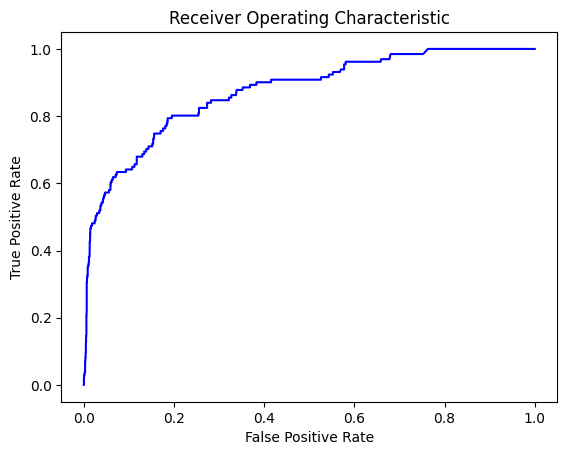

In [8]:
probs = cat.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')